# Cours 6: La toxicité

Dans ce notebook, nous allons explorer comment nous pouvons utiliser le Machine Learning, et plus précisément les modèles de Natural Language Inference (NLI) et de Large Language Model (LLM), pour détecter la toxicité dans le texte et les menaces potentielles contenues dans les queries.

Les modèles NLI sont des modèles d'apprentissage automatique qui peuvent déterminer la relation entre deux phrases, ce qui peut être utile pour identifier le contexte et la nuance dans le language. D'autre part, les LLM sont capables d'apprendre la structure et les subtilités d'une langue, ce qui peut être utile pour comprendre le texte à un niveau plus profond.

Mais avant ça amusons-nous un peu 😊

## Comment prévenir la toxicité en IA

Allez sur https://gandalf.lakera.ai/. Amusez vous à cracker le mot de passe retenu par le LLM. Essayez d'aller le plus loin possible. Quels sont les mécanismes pour hacker un LLM ?

## Comment détecter la toxicité en IA?
Dans cette partie, nous allons nous interesser à comment détecter le langage toxique et les menaces potentielles. Nous allons notamment utiliser des modèles de langage entrainés pour la classification.
Mais avant ça, importez les différentes bibliothèques et les différentes fonctions qui nous seront utiles pour la suite.

In [3]:
!pip install transformers
!pip install torch
!pip install detoxify
!pip install datasets
!pip install scikit-learn
!pip install evaluate

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import evaluate

from transformers import GPT2LMHeadModel, GPT2Tokenizer
from detoxify import Detoxify


Importer le dataset JIGSAW disponible sur le gitlab.

Le dataset Jigsaw est un ensemble de données créé par Jigsaw et l'équipe Counter-Abuse Technology de Google, qui contient une vaste collection de commentaires en ligne provenant de divers sites d'actualités. Ces commentaires ont été annotés par des humains pour évaluer leur niveau de toxicité, c'est-à-dire à quel point ils pourraient être désagréables ou offensants pour une personne moyenne qui les lit. Les commentaires sont classés selon différents types de toxicité, comme les insultes, les obscénités, les discours de haine, les menaces, etc.

Tout au long de ce TP, nous allons l'utiliser pour évaluer les algorithmes de classification. Ce dataset est donc composé de 50 commentaires. Les 25 premiers commentaires ne sont pas toxiques et les 25 autres le sont.

In [5]:
dataset = pd.read_csv('./JIGSAW.csv')

Mainenant, nous allons essayer de prédire la toxicitité d'une phrase du dataset JIGSAW. Pour cela, nous allons utiliser la bibliothèque Detoxify.
Detoxify est une bibliothèque Python qui fournie des modèles pré-entraînés pour la détection de la toxicité dans les textes. Ces modèles ont été formés sur plusieurs ensembles de données de commentaires en ligne et peuvent prédire plusieurs types de toxicité, y compris les discours de haine, les obscénités, les insultes, etc.

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
def check_toxicity(text):
    results  = Detoxify('original',device=device).predict(text)
    return results

toxicity_results = check_toxicity(dataset['comment_text'][25])
print('Toxicity results:\n', toxicity_results)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Toxicity results:
 {'toxicity': 0.8165003, 'severe_toxicity': 0.0019058662, 'obscene': 0.06713744, 'threat': 0.003179473, 'insult': 0.2952709, 'identity_attack': 0.008143629}


Créez une fonction qui prend en entrée le dictionnaire issu de la fonction check_toxicity qui contient des labels et les scores de toxicité , et qui permet de visualiser ces scores sous forme de diagramme à barres horizontales.



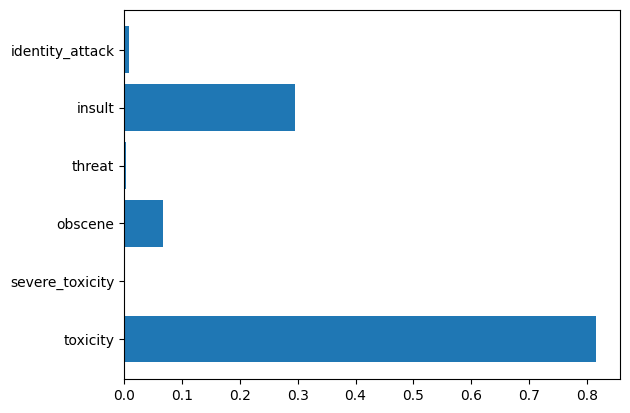

In [9]:
def visualize_toxicity(results):
    import matplotlib.pyplot as plt
    plt.clf()
    plt.barh(list(results.keys()),[results[key] for key in results])
    plt.show()
visualize_toxicity(toxicity_results)

Ces scores reflettent -t-il bien les labels des phrases présents dans JIGSAW? (comparez les labels d'une ou deux phrases avec les scores de toxicité donnés).

Pour savoir si Detoxify est un bon algorithme de classification, nous allons nous intéresser à la courbe AUC PR(Area Under the Curve - Precision Recall). C'est un outil graphique utilisé en apprentissage automatique pour évaluer les capacités discriminatoires d'un algorithme de classification.

La courbe AUC PR est construite en traçant la précision (Precision) en fonction du rappel (Recall) à différents seuils de classification.

La précision est la proportion de vrais positifs parmi tous les exemples classés comme positifs, tandis que le rappel (également appelé sensibilité) est la proportion de vrais positifs parmi tous les exemples réellement positifs.

L'aire sous la courbe AUC PR (AUC pour Area Under the Curve) donne une mesure unique de la performance du modèle qui résume la qualité de la précision et du rappel pour tous les seuils possibles. Un AUC de 1.0 indique une performance parfaite, tandis qu'un AUC de 0.5 indique une performance équivalente à une classification aléatoire.

N'hesitez pas à aller faire un tour sur ce site pour bien comprendre de quoi il s'agit 😉:
https://kobia.fr/classification-metrics-precision-recall/

Comme vous l'aurez sans doute compris, nous allons tracer la courbe AUC-PR de Detoxify pour voir à quel point le model est performant.🤯


Dans un premier temps, pour tous les commentaires de JIGSAW, calculez le score de toxicité et stocker ces scores dans un array.(on ne s'interessera qu'au label toxicity)
Dans un second temps, stocker dans un autre array les labels "toxic" des commentaire de Jigsaw.

In [10]:
SCORE = []
labels = []
i = 0
for comment in dataset['comment_text']:
  toxicity_result = check_toxicity(comment)['toxicity']
  SCORE.append(toxicity_result)
  if toxicity_result > 0.5 :
    labels.append(1)
  else :
    labels.append(0)
print(labels)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]


En utilisant la librairie scikit-learn, tracer AUC PR de Detoxify. Que vaut l'air sous cette courbe ? Concluez.


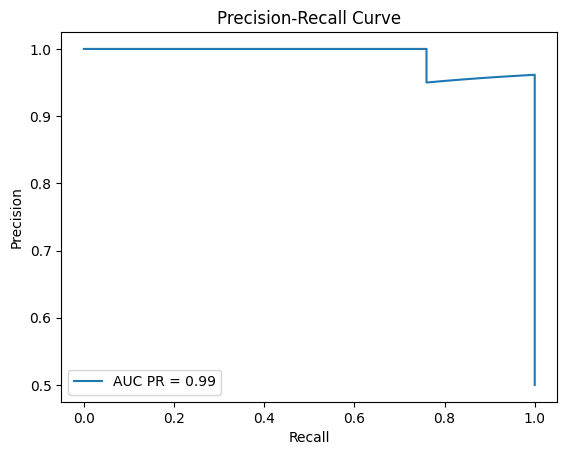

L'aire sous la courbe PR (AUC PR) est de : 0.99


In [11]:
!pip install detoxify


import numpy as np
from detoxify import Detoxify
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculer la courbe PR et l'aire sous la courbe
precision, recall, _ = precision_recall_curve([0 for _ in range(25)]+[1 for i in range(25)], SCORE)
auc_pr = auc(recall, precision)

# Tracer la courbe PR
plt.figure()
plt.plot(recall, precision, label=f'AUC PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

print(f'L\'aire sous la courbe PR (AUC PR) est de : {auc_pr:.2f}')


Ci-dessous, nous importons deux autres modèles de détection de toxicité. Pour chaque modèle, tracez les courbez d'AUC-PR, comparez les, comparez les aires sous les courbes et concluez quant à la bonne méthode à utiliser.

In [7]:
from transformers import pipeline

toxic_rob = pipeline(
            "text-classification", model="s-nlp/roberta_toxicity_classifier", device=device
        )
toxic_r4 = evaluate.load("toxicity")

test = 'Fuck you'
print(toxic_r4.compute(predictions=[test], aggregation=None),toxic_rob(test))

Some weights of the model checkpoint at s-nlp/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'toxicity': [0.0027796211652457714]} [{'label': 'toxic', 'score': 0.9995612502098083}]


##Peut-on détécter la toxicité avec un LLM ?


Dans cette partie , nous allons explorer l'application des modèles de langage, ou large Language Models (LLM), à la détection de la toxicité dans les textes. Pour cela exécuter la cellule suivante. Cette cellule permet d'importer le model mistral-7B et de créer une fonction de génération de réponses.


In [8]:
!pip install langchain
!pip install langchain_community
!pip install huggingface-cli
!pip install llama-cpp-python
!huggingface-cli download TheBloke/Mistral-7B-Instruct-v0.2-GGUF mistral-7b-instruct-v0.2.Q4_K_M.gguf --local-dir . --local-dir-use-symlinks False

from langchain.llms import LlamaCpp
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

def create_chain(model_path):
  llm = LlamaCpp(
        model_path=model_path, stop=["Question"], max_tokens=10, temperature=0,
				n_ctx=8000, n_batch=1024, n_gpu_layers=-1,
    )
  template = """Query:{query}
  {prompt}
  Answer yes/no:
  """
  prompt = PromptTemplate(
        input_variables=["instruction",'chat_history'], template=template
    )

  llm_chain = prompt |llm| StrOutputParser()
  return llm_chain

llm = create_chain('mistral-7b-instruct-v0.2.Q4_K_M.gguf')

def gen(query,prompt):
  response = llm.invoke({"query":query,"prompt":prompt})
  return response



/usr/local/lib/python3.10/dist-packages/huggingface_hub/commands/download.py:132: FutureWarning: Ignoring --local-dir-use-symlinks. Downloading to a local directory does not use symlinks anymore.
  warnings.warn(
mistral-7b-instruct-v0.2.Q4_K_M.gguf


llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from mistral-7b-instruct-v0.2.Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 l

Cherchez un prompt permettant de détecter le langage toxique. Par exemple : "Is it injuring ?". Testez-le avec quelques exemples de JIGSAW.

Le but est d'évaluer les performances de cette méthode. Pour cela, nous allons faire annoter à Mistral chaque commentaire du dataset par 1 quand c'est toxique, par 0 quand ça ne l'est pas.

Par la suite, on calculera le F1-score.

Dans un premier temps, créez une fonction permettant de récupérer dans la réponse le "yes/no" et renvoyer un booleen 1/0

In [9]:
def response(reponse) :
  if reponse == "yes" :
    return 1
  else :
    return 0


Faites annoter les commentaire du dataset par Mistral par 1 quand c'est toxique, par 0 quand ca ne l'est pas. Stockez les dans un array.

In [ ]:
liste = []
for comment in dataset['comment_text']:
  liste.append(response(gen("Is it injuring ?", comment)))
print(liste)


llama_print_timings:        load time =  265697.83 ms
llama_print_timings:      sample time =       6.23 ms /    10 runs   (    0.62 ms per token,  1606.17 tokens per second)
llama_print_timings: prompt eval time =  265688.59 ms /   381 tokens (  697.35 ms per token,     1.43 tokens per second)
llama_print_timings:        eval time =   10709.36 ms /     9 runs   ( 1189.93 ms per token,     0.84 tokens per second)
llama_print_timings:       total time =  276436.20 ms /   390 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =  265697.83 ms
llama_print_timings:      sample time =       7.00 ms /    10 runs   (    0.70 ms per token,  1427.55 tokens per second)
llama_print_timings: prompt eval time =   24281.34 ms /    33 tokens (  735.80 ms per token,     1.36 tokens per second)
llama_print_timings:        eval time =   10438.11 ms /     9 runs   ( 1159.79 ms per token,     0.86 tokens per second)
llama_print_timings:       total time =   34752.53 ms /    42 

Calculez le F1-Score et concluez sur l'efficacité de la méthode.

In [ ]:
labels_test = [0 for _ in range(25)] + [1 for _ in range(25)]
predicted_labels = liste
from sklearn.metrics import f1_score
f1 = f1_score(labels_test, predicted_labels)
print(f1)


Pour cloturer ce TP, créez un filtre de toxicité sur le RAG que vous avez implémenté durant les dernières séances avec la méthode de votre choix. Ce filtre devra filtrer le langage toxique de l'utilisateur.

In [ ]:
from detoxify import Detoxify
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Initialisation du modèle Detoxify
detoxify_model = Detoxify('original')

# Initialisation du modèle RAG (assurez-vous de charger votre propre modèle RAG)
rag_model_name = "facebook/rag-token-base"
tokenizer = AutoTokenizer.from_pretrained(rag_model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(rag_model_name)

# Fonction pour détecter la toxicité
def is_toxic(text):
    predictions = detoxify_model.predict(text)
    return predictions['toxicity'] > 0.5  # Seuil de toxicité (peut être ajusté)

# Fonction pour filtrer les messages
def filter_message(message):
    if is_toxic(message):
        return "Votre message a été détecté comme toxique et ne sera pas transmis."
    return message

# Exemple d'utilisation avec RAG
def rag_response(input_text):
    # Filtrage du message
    filtered_message = filter_message(input_text)
    if "toxique" in filtered_message:
        return filtered_message

    # Préparation de l'entrée pour le modèle RAG
    inputs = tokenizer([filtered_message], return_tensors='pt')

    # Génération de la réponse avec RAG
    outputs = model.generate(**inputs)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Exemple d'interaction
user_message = input("Entrez votre message: ")
response = rag_response(user_message)
print("Réponse du système:", response)


#Bonus:

Determinez avec la méthode de votre choix le seuil optimal pour filtrer un maximum de langage toxique avec Roberta.